In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical


# Load Data

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train/255.
x_train = x_train.reshape(-1, 28, 28, 1)

x_test = x_test/255.
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes = 10)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28, 1)
float64


# Define Model

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

# Training

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 25, batch_size = 128, verbose = 2)

# Testing and Save model

In [0]:
results = model.predict(x_test)
results = np.argmax(results, axis = 1)
diff = results - y_test
print("Test accuracy:", 1.-(np.count_nonzero(diff)/len(diff)))

In [12]:
model.save('my_model.h5')
from google.colab import files
files.download('my_model.h5') 

--2019-05-04 15:40:25--  https://www.puzz.com/sudoku33p.png
Resolving www.puzz.com (www.puzz.com)... 104.239.231.222
Connecting to www.puzz.com (www.puzz.com)|104.239.231.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3862 (3.8K) [image/png]
Saving to: ‘sudoku33p.png’

sudoku33p.png       100%[===================>]   3.77K  --.-KB/s    in 0s      

2019-05-04 15:40:25 (128 MB/s) - ‘sudoku33p.png’ saved [3862/3862]



# Testing on Sudoku

In [0]:
!wget "https://www.puzz.com/sudoku33p.png"

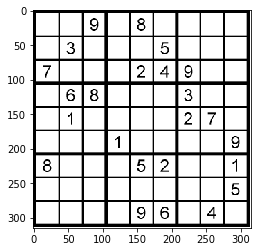

35.0
0 0 0 0.0
1 0 1 0.0
2 0 2 56.375
3 0 3 0.0
4 0 4 58.285
5 0 5 0.0
6 0 6 0.0
7 0 7 0.0
8 0 8 0.0
9 1 0 0.0
10 1 1 49.2125
11 1 2 0.0
12 1 3 0.0
13 1 4 0.0
14 1 5 53.81
15 1 6 0.0
16 1 7 0.0
17 1 8 0.0
18 2 0 33.325
19 2 1 0.0
20 2 2 0.0
21 2 3 0.0
22 2 4 49.7675
23 2 5 49.33
24 2 6 59.215
25 2 7 0.0
26 2 8 0.0
27 3 0 0.0
28 3 1 60.755
29 3 2 61.3325
30 3 3 0.0
31 3 4 0.0
32 3 5 0.0
33 3 6 49.2125
34 3 7 0.0
35 3 8 0.0
36 4 0 0.0
37 4 1 28.275
38 4 2 0.0
39 4 3 0.0
40 4 4 0.0
41 4 5 0.0
42 4 6 46.575
43 4 7 28.5075
44 4 8 0.0
45 5 0 0.0
46 5 1 0.0
47 5 2 0.0
48 5 3 28.4175
49 5 4 0.0
50 5 5 0.0
51 5 6 0.0
52 5 7 0.0
53 5 8 56.375
54 6 0 61.3325
55 6 1 0.0
56 6 2 0.0
57 6 3 0.0
58 6 4 53.81
59 6 5 49.7675
60 6 6 0.0
61 6 7 0.0
62 6 8 29.2675
63 7 0 0.0
64 7 1 0.0
65 7 2 0.0
66 7 3 0.0
67 7 4 0.0
68 7 5 0.0
69 7 6 0.0
70 7 7 0.0
71 7 8 53.81
72 8 0 0.0
73 8 1 0.0
74 8 2 0.0
75 8 3 0.0
76 8 4 59.215
77 8 5 60.755
78 8 6 0.0
79 8 7 49.33
80 8 8 0.0
(315, 315)
24
0 2


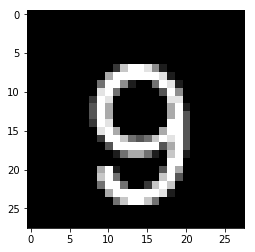

1 4


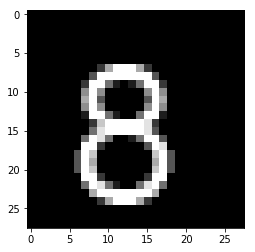

2 10


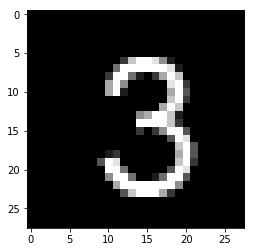

3 14


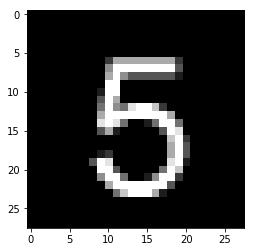

4 18


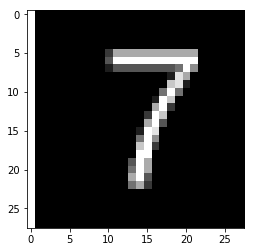

5 22


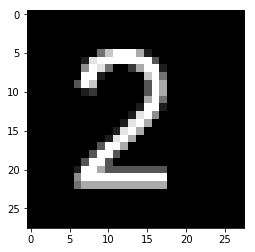

6 23


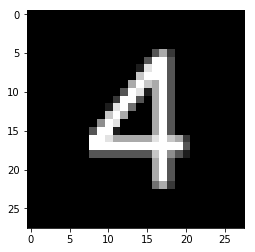

7 24


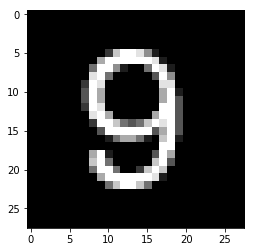

8 28


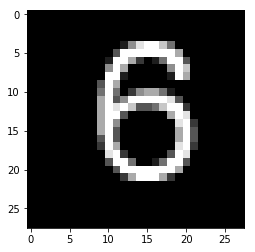

9 29


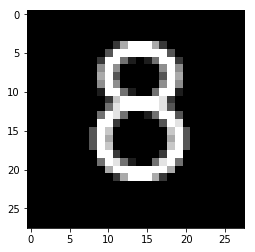

10 33


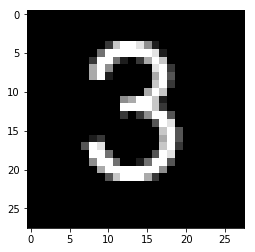

11 37


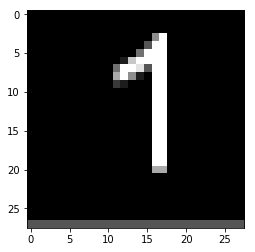

12 42


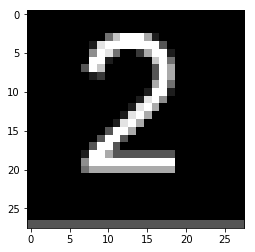

13 43


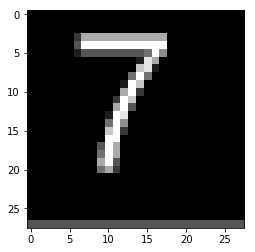

14 48


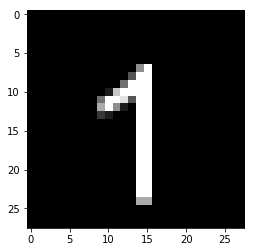

15 53


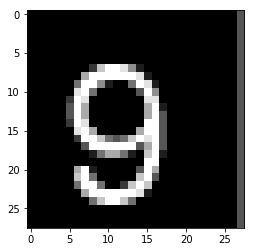

16 54


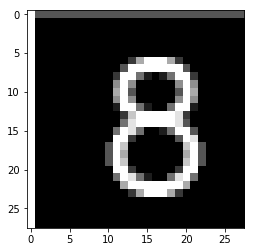

17 58


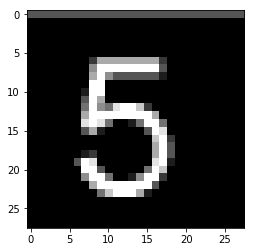

18 59


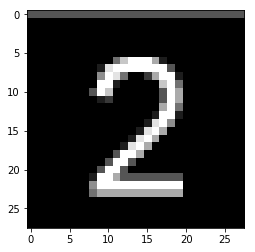

19 62


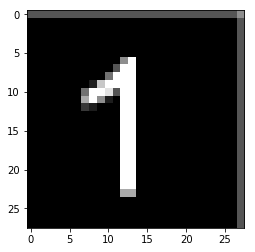

20 71


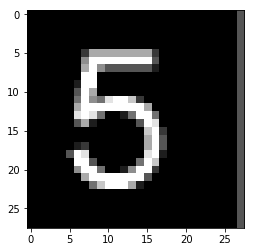

21 76


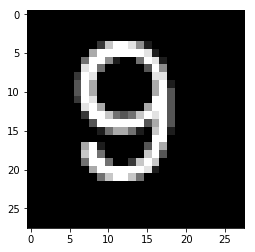

22 77


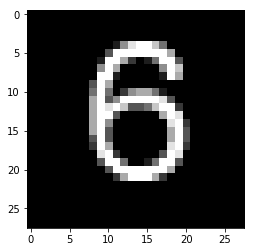

23 79


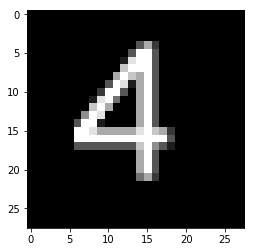

In [15]:
from PIL import Image
import cv2
img = cv2.imread('sudoku33p.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
images = []
images_idx = []
h, w = 28, 28
x, y = int(3+35*1), int(35+7.5)
cnt = 0
plt.imshow(gray, cmap="gray")
plt.show()

print(gray.shape[0]/9.)

for i in range(9):
  y = int(5.+i*35)
  if (i >= 5):
    y -= 5
  for j in range(9):
    x = int(4.+35*j)
    if (j >= 5):
      x -= 3
    crop_img = 255-gray[y:y+h, x:x+w]
    print(cnt, i, j, np.mean(crop_img[4:24,4:24]))
    if (np.mean(crop_img[4:24,4:24]) > 22.):
      images.append(crop_img)
      images_idx.append(cnt)
    cnt += 1
    

# h, w = 28, 28
# y = 70
# x = 5
# print(list(set(range(10)) - set([1,2])))
crop_img = gray[y:y+h, x:x+w]
print(gray.shape)
# images = [images[i] for i in list(set(range(len(images)))-set([8,12, 13, 17, 18, 19, 22, 23, 24, 25, 30, 32, 33, 35, 36, 37, 38, 41, 43,]))]
print(len(images))
for i in range(len(images)):
  print(i, images_idx[i])
  plt.imshow(images[i], cmap="gray")
  plt.show()
# plt.imshow(crop_img, cmap="gray")
# print(crop_img.shape)

(24, 28, 28, 1)


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


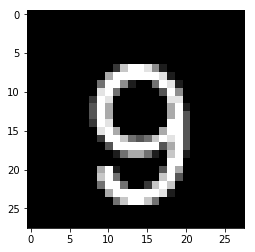

In [0]:
# print(np.max(crop_img))
# for image in images:
test_image = np.array(images)/255.
test_image = transform.resize(test_image, (len(images), 28, 28, 1))
# test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)
plt.imshow(test_image[0,:,:,0], cmap="gray")

(24, 10)
Predicted value: 9


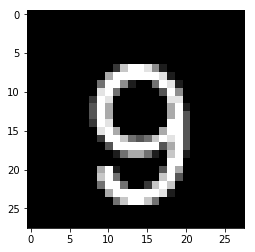

Predicted value: 8


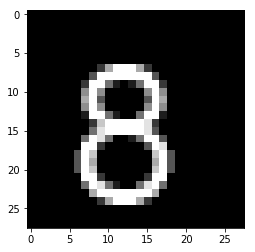

Predicted value: 3


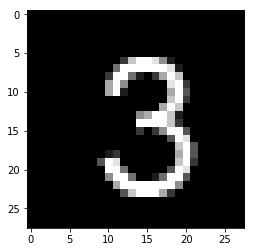

Predicted value: 5


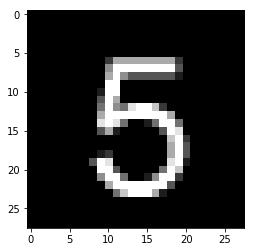

Predicted value: 7


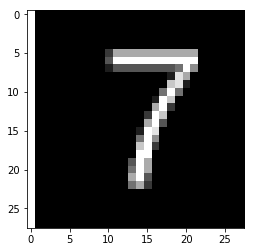

Predicted value: 2


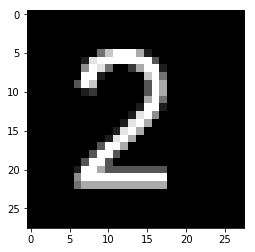

Predicted value: 4


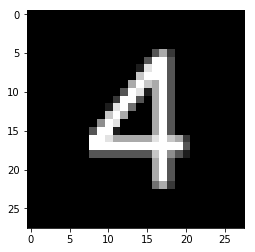

Predicted value: 9


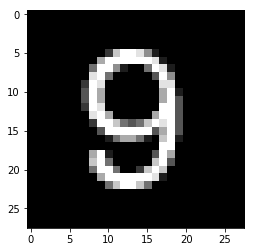

Predicted value: 6


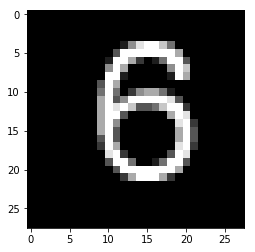

Predicted value: 8


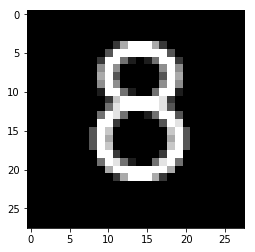

Predicted value: 3


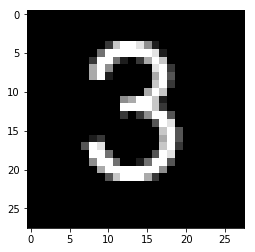

Predicted value: 1


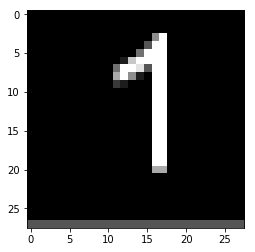

Predicted value: 2


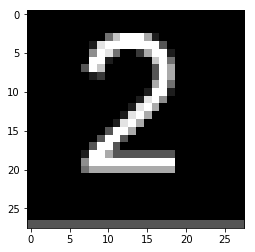

Predicted value: 7


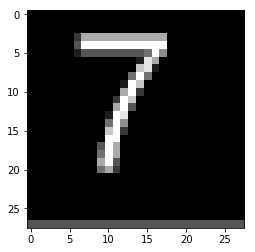

Predicted value: 1


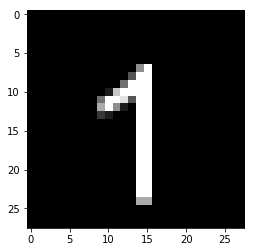

Predicted value: 9


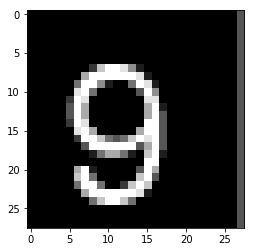

Predicted value: 8


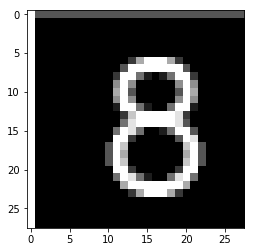

Predicted value: 5


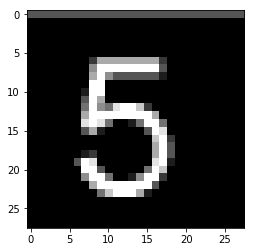

Predicted value: 2


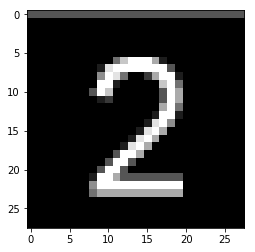

Predicted value: 1


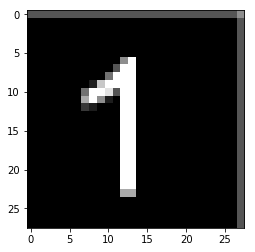

Predicted value: 5


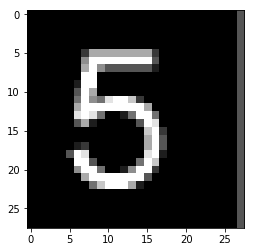

Predicted value: 9


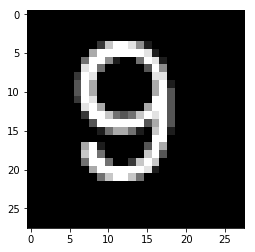

Predicted value: 6


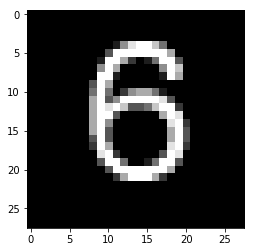

Predicted value: 4


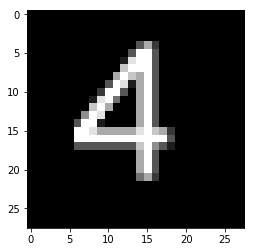

In [0]:
result = model.predict(test_image)
print(result.shape)
# print(np.argmax(result))
for i in range(len(images)):
  print("Predicted value:", np.argmax(result[i]))
  plt.imshow(images[i], cmap="gray")
  plt.show()